In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")

In [2]:
df = pd.read_csv('./gender_wage_gap.csv')

df['men_women_diff'] = df.men_average - df.women_average
df['black_white_diff'] = df.white_men_average - df.black_men_average
df.head()

,year,men_median,men_average,women_median,women_average,white_men_median,white_men_average,black_men_median,black_men_average,hispanic_men_median,hispanic_men_average,white_women_median,white_women_average,black_women_median,black_women_average,hispanic_women_median,hispanic_women_average,men_women_diff,black_white_diff
0,2022,24.91,35.82,20.74,27.86,27.11,39.10,20.02,27.43,19.99,26.63,22.47,29.50,19.00,23.99,17.54,22.60,7.96,11.67
1,2021,24.93,35.61,21.46,28.28,27.76,38.78,20.08,26.88,20.20,26.45,22.76,29.90,18.85,24.13,17.77,22.90,7.33,11.90
2,2020,25.95,36.03,21.72,28.75,28.36,39.08,20.56,27.40,20.41,27.05,23.05,30.30,19.26,24.87,17.55,23.03,7.28,11.68
3,2019,24.04,33.65,20.42,26.83,27.39,36.84,19.31,25.18,19.39,25.08,22.01,28.41,18.08,23.17,17.08,21.50,6.82,11.66
4,2018,23.42,33.19,19.73,26.21,26.79,36.55,18.66,24.67,18.77,24.55,21.75,28.01,17.34,22.55,16.24,20.60,6.98,11.88


In [3]:
df.isna().sum().sum() # no missing data

0

In [4]:
df.describe()

,year,men_median,men_average,women_median,women_average,white_men_median,white_men_average,black_men_median,black_men_average,hispanic_men_median,hispanic_men_average,white_women_median,white_women_average,black_women_median,black_women_average,hispanic_women_median,hispanic_women_average,men_women_diff,black_white_diff
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1997.50000,23.241000,28.921400,17.59580,21.699400,25.220600,30.959800,18.55500,22.519200,17.293800,21.432600,18.437600,22.53180,15.916200,19.541400,14.532800,17.845400,7.222000,8.440600
std,14.57738,0.912702,2.706539,1.90173,3.362138,1.155788,3.444436,0.83803,1.791357,1.329548,1.908348,2.384421,3.88397,1.527008,2.407148,1.148307,2.062507,1.291522,1.750641
min,1973.00000,21.510000,26.200000,14.88000,17.010000,23.160000,27.340000,16.90000,20.400000,14.970000,18.930000,15.220000,17.23000,13.380000,15.680000,13.250000,15.070000,5.630000,5.970000
25%,1985.25000,22.815000,26.630000,15.84000,18.540000,24.445000,27.952500,18.03250,21.075000,16.442500,20.515000,16.105000,18.82750,14.710000,17.375000,13.665000,16.267500,6.172500,7.070000
50%,1997.50000,23.360000,27.855000,17.43500,21.365000,25.135000,29.660000,18.68000,22.000000,17.220000,21.060000,18.110000,22.21500,15.775000,19.165000,14.115000,17.250000,6.610000,8.000000
75%,2009.75000,23.765000,30.185000,19.05500,24.295000,26.000000,32.885000,19.11750,23.512500,18.330000,21.807500,20.310000,25.62500,17.067500,21.427500,14.997500,19.120000,8.515000,9.755000
max,2022.00000,25.950000,36.030000,21.72000,28.750000,28.360000,39.100000,20.56000,27.430000,20.410000,27.050000,23.050000,30.30000,19.260000,24.870000,17.770000,23.030000,9.650000,11.900000


# EDA

In [5]:
avg_df = df[df.year == 2022]

avg_df = avg_df[['white_men_average', 'black_men_average', 'hispanic_men_average',
             'white_women_average', 'black_women_average', 'hispanic_women_average']]

avg_df = avg_df.transpose().reset_index().rename(columns = {'index': 'Group', 0: 'Avg. Wage'})
avg_df = avg_df.sort_values(by = 'Avg. Wage', ascending = False)
avg_df

,Group,Avg. Wage
0,white_men_average,39.10
3,white_women_average,29.50
1,black_men_average,27.43
2,hispanic_men_average,26.63
4,black_women_average,23.99
5,hispanic_women_average,22.60


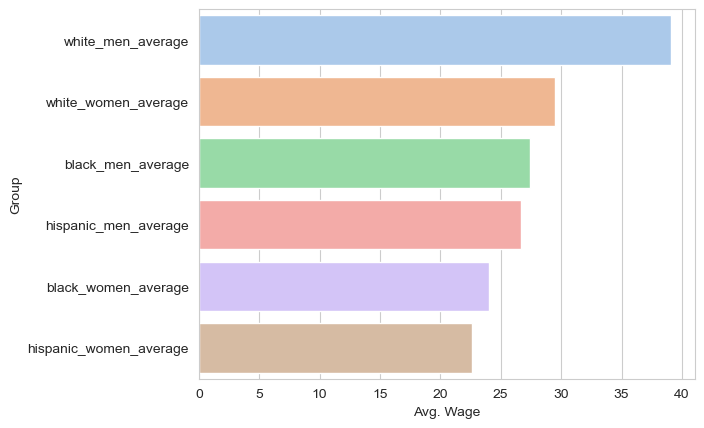

In [6]:
plt.figure()
sns.barplot(data = avg_df, x = 'Avg. Wage', y = 'Group')
plt.show()

## Gender Wage Gap

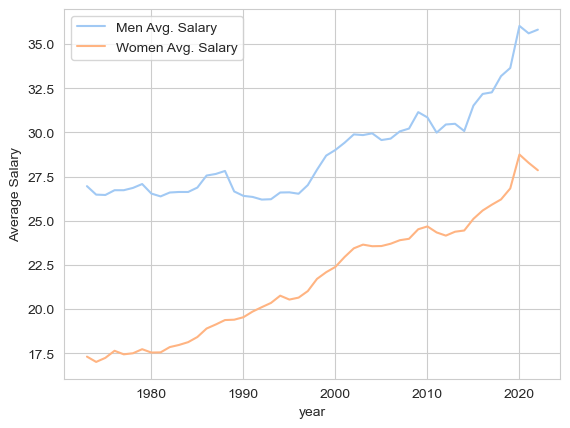

In [7]:
# let's explore the difference in wage gap over time
plt.figure()
sns.lineplot(data = df, x = 'year', y = 'men_average', label = 'Men Avg. Salary')
sns.lineplot(data = df, x = 'year', y = 'women_average', label = 'Women Avg. Salary')
plt.ylabel("Average Salary")
plt.legend()
plt.show()

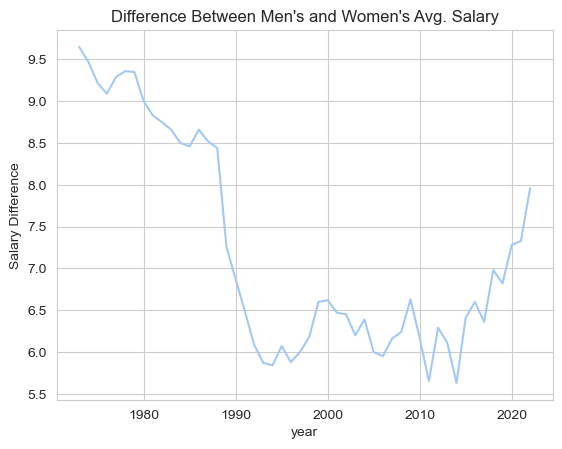

In [8]:
plt.figure()
sns.lineplot(data = df, x = 'year', y = 'men_women_diff')
plt.title("Difference Between Men's and Women's Avg. Salary")
plt.ylabel("Salary Difference")
plt.show()

## Race Wage Gap

## Men

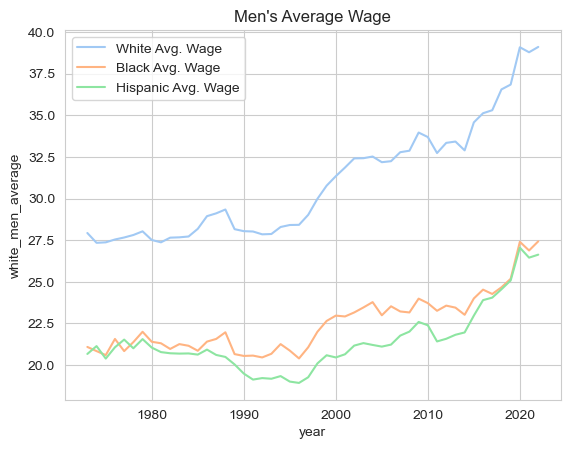

In [9]:
# Let's now turn our attention to average salary of different races of men, and women, respectively
plt.figure()
sns.lineplot(data = df, x = 'year', y = 'white_men_average', label = 'White Avg. Wage')
sns.lineplot(data = df, x = 'year', y = 'black_men_average', label = 'Black Avg. Wage')
sns.lineplot(data = df, x = 'year', y = 'hispanic_men_average', label = 'Hispanic Avg. Wage')

plt.legend()
plt.title("Men's Average Wage")
plt.show()

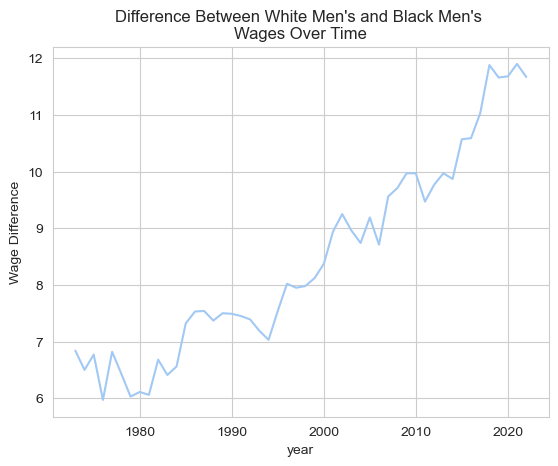

In [10]:
plt.figure()
sns.lineplot(data = df, x = 'year', y = 'black_white_diff')

plt.ylabel("Wage Difference")
plt.title("Difference Between White Men's and Black Men's \nWages Over Time")
plt.show()

The difference between white men's wages and black men's wages has actually increased over the past 40 years.

## Women

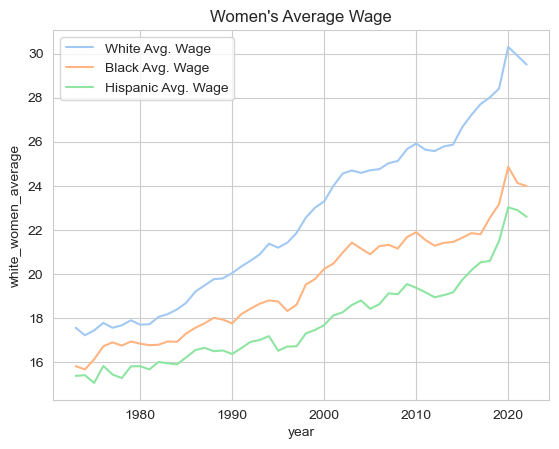

In [11]:
# Let's now turn our attention to average salary of different races of men, and women, respectively
plt.figure()
sns.lineplot(data = df, x = 'year', y = 'white_women_average', label = 'White Avg. Wage')
sns.lineplot(data = df, x = 'year', y = 'black_women_average', label = 'Black Avg. Wage')
sns.lineplot(data = df, x = 'year', y = 'hispanic_women_average', label = 'Hispanic Avg. Wage')

plt.legend()
plt.title("Women's Average Wage")
plt.show()